# Assignment_3 SVM

In [ ]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

# Part 2: SVM

### Use the following function to plot the classification regions

In [ ]:
def plot_class_regions_for_classifier(clf, X, y, X_test=None, y_test=None, title=None, target_names = None, plot_decision_regions = True):

    numClasses = np.amax(y) + 1
    color_list_light = ['#FFFFAA', '#EFEFEF', '#AAFFAA', '#AAAAFF']
    color_list_bold = ['#EEEE00', '#000000', '#00CC00', '#0000CC']
    cmap_light = ListedColormap(color_list_light[0:numClasses])
    cmap_bold  = ListedColormap(color_list_bold[0:numClasses])

    h = 0.03
    k = 0.5
    x_plot_adjust = 0.1
    y_plot_adjust = 0.1
    plot_symbol_size = 50

    x_min = X[:, 0].min()
    x_max = X[:, 0].max()
    y_min = X[:, 1].min()
    y_max = X[:, 1].max()
    x2, y2 = np.meshgrid(np.arange(x_min-k, x_max+k, h), np.arange(y_min-k, y_max+k, h))
    # np.c_ Translates slice objects to concatenation along the second axis
    # e.g. np.c_[np.array([[1,2,3]]), 0, 0, np.array([[4,5,6]])]
    # ravel() Returns a contiguous flattened array.
    # x = np.array([[1, 2, 3], [4, 5, 6]])
    # np.ravel(x) = [1 2 3 4 5 6]
    P = clf.predict(np.c_[x2.ravel(), y2.ravel()])
    P = P.reshape(x2.shape)
    plt.figure()
    if plot_decision_regions:
        plt.contourf(x2, y2, P, cmap=cmap_light, alpha = 0.8)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=plot_symbol_size, edgecolor = 'black')
    plt.xlim(x_min - x_plot_adjust, x_max + x_plot_adjust)
    plt.ylim(y_min - y_plot_adjust, y_max + y_plot_adjust)

    if (X_test is not None):
        plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, s=plot_symbol_size, marker='^', edgecolor = 'black')
        train_score = clf.score(X, y)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    if (target_names is not None):
        legend_handles = []
        for i in range(0, len(target_names)):
            patch = mpatches.Patch(color=color_list_bold[i], label=target_names[i])
            legend_handles.append(patch)
        plt.legend(loc=0, handles=legend_handles)

    if (title is not None):
        plt.title(title)
    plt.show()

### Use the following dataset in questions 1, 2, and 3.

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)

#### Question 1
Split the data into training and testing datasets (use random_state=0 and 25% of the data for testing)

In [ ]:
from sklearn.model_selection import  train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#### Question 2
1. Train an SVM classifier using linear kernel.
2. Plot the classification regions using the training dataset.

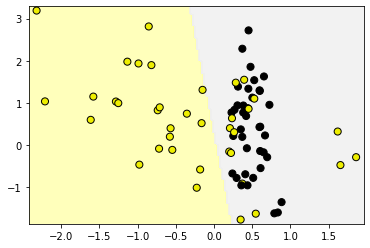

In [ ]:
from sklearn import svm

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

plot_class_regions_for_classifier(clf, X_train, y_train)

#### Question 3
1. Train an SVM classifier using linear kernel with C=0.00001.
2. Train another SVM classifier using linear kernel with C=100
3. Plot the classification regions for both cases using the training dataset.
4. Comment on the results.

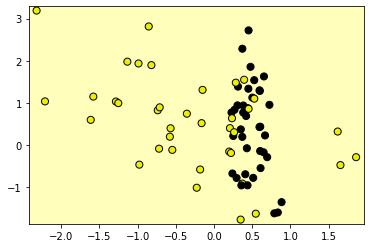

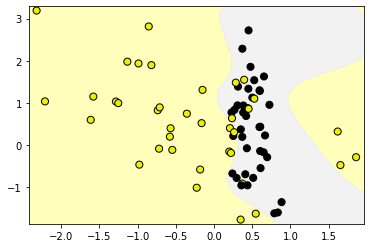

In [ ]:
clf_one = svm.SVC(C = 0.00001 , kernel='rbf')
clf_one.fit(X_train, y_train)
plot_class_regions_for_classifier(clf_one, X_train, y_train)

clf_two = svm.SVC(C = 100 , kernel='rbf')
clf_two.fit(X_train, y_train)
plot_class_regions_for_classifier(clf_two, X_train, y_train)

**Answer**

The strength of the regularization is inversely proportional to C, so when c is small we get a large regularization and the system won't be able to classify as the regularization term is quite large, when c is large we get little regularization and the model classify normally.

### Use the fruits dataset in questions 4, 5, 6.

In [ ]:
import pandas as pd
fruits = pd.read_table('fruit_data_with_colors.txt')
feature_names_fruits = ['height', 'width', 'mass', 'color_score']

FileNotFoundError: ignored

#### Question 4
1. Split the data by columns into X_fruits and y_fruits where X_fruits is the data records and y_fruits is the labels.
2. Using only the **'height'** and **'width'** features, split the data into training and testing using random_state=0, and 25% of the data for testing.
3. Using **sklearn LinearSVC**, train a linear svm

#### Question 5
For the previous model from question 4. 
1. How many SVM models have been trained? and Why?
2. Print the models' coefficients and intercepts.

#### Question 6
Plot the classification boundary of each svm on a scatter plot of the training data.

from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)### Use the breast cancer dataset in question 7, 8, and9.

In [ ]:
from sklearn.datasets import load_breast_cancer
(X_cancer, y_cancer) = load_breast_cancer(return_X_y = True)

#### Question 7
1. Split the dataset into training and testing datasets, use random_state = 0, and 25% of the data for testing.
2. Use GridSearchCV to find the best C value for and SVM classifier with rbf kernel and print the best C value. *use:*  
```python
parameters = {'kernel' : ('poly', 'rbf'), 'C':[0.01, 0.1, 0.5, 1, 10]}
```
3. Print the best parameters resulted from your grid search.

In [ ]:
from sklearn.model_selection import GridSearchCV

#### Question 8
Train an SVM model using the best parameters resulted from question 7, then calculate and print the training and testing accuracy.

#### Question 9
Improve the previous results from question 8.

**Hint:** Don't change the model, instead, make some preprocessing on the data.